In [44]:
import numpy as np
import h5py
import pydicom
from scipy.ndimage.interpolation import zoom
from glob import glob

import matplotlib.pyplot as plt
plt.set_cmap('gray')

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post):
    fig = plt.figure(figsize=(18, 12))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast')

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage')

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage')

    plt.show()

def resample_isotropic(fpath_h5, dirpath_dicom):
    new_spacing = [1., 1., 1.]
    
    fpath_dicom = [fpath for fpath in glob('{}/**/*.dcm'.format(dirpath_dicom), recursive=True)][0]
    
    dicom = pydicom.dcmread(fpath_dicom)
    img = np.array(h5py.File(fpath_h5)['data'])[:, 0, ...]
    
    spacing = np.array([float(dicom.SliceThickness), float(dicom.PixelSpacing[0]), float(dicom.PixelSpacing[1])])
    
    resize_factor = spacing / new_spacing
    new_shape = np.round(img.shape * resize_factor)
    real_resize_factor = new_shape / img.shape
    new_spacing = spacing / real_resize_factor
    
    print('new spacing', new_spacing)
    
    return zoom(img, real_resize_factor)

<Figure size 432x288 with 0 Axes>

In [52]:
img_hoag = resample_isotropic(
    '/home/srivathsa/projects/studies/gad/hoag/preprocess/data/Id0031.h5',
    '/home/srivathsa/projects/studies/gad/hoag/data/Id0031/'
)

print(img_hoag.shape)

(179, 240, 240)


In [53]:
img_tiantan = resample_isotropic(
    '/home/srivathsa/projects/studies/gad/tiantan_pp/data/NO21.h5',
    '/home/srivathsa/projects/studies/gad/tiantan/NO21'
)

print(img_tiantan.shape)

(196, 240, 240)


In [55]:
img_stanford = resample_isotropic(
    '/home/srivathsa/projects/studies/gad/stanford/preprocess/data/Patient_0101.h5',
    '/home/srivathsa/projects/studies/gad/stanford/data/Patient_0101'
)

print(img_stanford.shape)

(336, 240, 240)


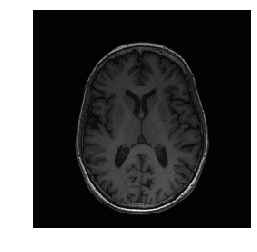

In [56]:
show_img(img_stanford[168])